In [5]:
# !pip install cvxpy==1.0.21

In [144]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import random
# from cvxpy import *

In [145]:
data_root = 'stock-data/'
filenames = glob.glob(data_root+"/*.csv")

In [146]:
filenames

['data/stock-data/excel_mwg.csv',
 'data/stock-data/excel_hbd.csv',
 'data/stock-data/excel_ctg.csv',
 'data/stock-data/excel_bid.csv',
 'data/stock-data/excel_hpg.csv',
 'data/stock-data/excel_pow.csv',
 'data/stock-data/excel_plx.csv',
 'data/stock-data/excel_nvl.csv',
 'data/stock-data/excel_kdh.csv',
 'data/stock-data/excel_vcb.csv',
 'data/stock-data/excel_msn.csv',
 'data/stock-data/excel_tcb.csv',
 'data/stock-data/excel_fpt.csv',
 'data/stock-data/excel_vic.csv',
 'data/stock-data/excel_vnm.csv',
 'data/stock-data/excel_tpb.csv',
 'data/stock-data/excel_vre.csv',
 'data/stock-data/excel_pdr.csv',
 'data/stock-data/excel_pnj.csv',
 'data/stock-data/excel_gas.csv',
 'data/stock-data/excel_mbb.csv',
 'data/stock-data/excel_ssi.csv',
 'data/stock-data/excel_bvh.csv',
 'data/stock-data/excel_stb.csv',
 'data/stock-data/excel_vhm.csv',
 'data/stock-data/excel_vjc.csv',
 'data/stock-data/excel_gvr.csv',
 'data/stock-data/excel_abc.csv',
 'data/stock-data/excel_sab.csv',
 'data/stock-d

In [170]:
## Example stock
temp = pd.read_csv(filenames[1])
display(temp.head())
display(temp.index[0])
temp['<CloseFixed>']

,<Ticker>,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>,<Open>,<High>,<Low>,<Close>,<VolumeDeal>,<VolumeFB>,<VolumeFS>
0,HBD,20210812,13.8,13.8,13.8,13.8,1,13.8,13.8,13.8,13.8,0,1,0
1,HBD,20210811,13.8,13.8,13.8,13.8,100,13.8,13.8,13.8,13.8,0,0,0
2,HBD,20210804,0.0,15.3,14.0,15.3,1200,0.0,15.3,14.0,15.3,0,0,0
3,HBD,20210721,0.0,15.4,15.4,15.4,200,0.0,15.4,15.4,15.4,0,100,0
4,HBD,20210720,15.5,15.5,15.5,15.5,100,15.5,15.5,15.5,15.5,0,100,0


0

0       13.8000
1       13.8000
2       15.3000
3       15.4000
4       15.5000
         ...   
1838     6.1429
1839     5.8552
1840     5.5845
1841     5.3306
1842     5.0768
Name: <CloseFixed>, Length: 1843, dtype: float64

In [171]:
def cal_ret(file, T, period):
    data = pd.read_csv(file)
    pr = np.array(data['<CloseFixed>'])
    ret = (pr[T:] - pr[:-T])/pr[:-T]
    date = np.array(data['<DTYYYYMMDD>'])
    return ret[:period], date[:period]

In [217]:
all_vn30_rets = {}
period = 30 # history time (days)
for file in filenames:
    name = file.split("/")[-1].split(".")[0].split("_")[-1]
    ret, date = cal_ret(file, 1, period)
    all_vn30_rets[name] = ret
mr = pd.DataFrame(all_vn30_rets)
mr.set_index(date)

,mwg,hbd,ctg,bid,hpg,pow,plx,nvl,kdh,vcb,...,mbb,ssi,bvh,stb,vhm,vjc,gvr,abc,sab,vpb
20210813,0.009501,0.000000,0.008798,0.011820,0.002070,0.008889,0.017274,0.000966,0.001239,0.007056,...,0.001698,-0.017036,0.014679,0.003390,-0.019279,0.002534,0.005865,0.015748,0.002620,-0.019017
20210812,0.029412,0.108696,-0.002907,0.007009,0.011364,0.008811,0.007547,0.002896,-0.008663,0.006006,...,0.006780,0.000000,-0.019892,0.027027,-0.008547,0.000000,-0.005831,-0.023256,0.007185,-0.011309
20210811,-0.006286,0.006536,0.010204,0.004640,0.009193,-0.017467,0.007491,0.006737,0.046192,-0.014925,...,-0.001684,0.029463,-0.014760,0.006579,0.008621,0.000000,0.026393,-0.007937,-0.000649,-0.011438
20210810,-0.000575,0.006494,-0.002886,-0.003464,0.006073,-0.008889,-0.016729,0.013384,0.010740,-0.007071,...,0.008432,-0.001684,0.009363,0.003268,0.003419,0.006740,0.005714,-0.040000,0.006489,0.008264
20210809,-0.013234,-0.122581,-0.011577,-0.005794,-0.026157,-0.013453,0.000000,0.014151,-0.022432,-0.002035,...,-0.008361,-0.048904,-0.001855,-0.013029,-0.029813,-0.017573,-0.028409,-0.016667,0.000645,-0.006557
20210806,0.008746,0.000000,0.001464,0.001166,0.008264,-0.018182,-0.009452,0.004651,-0.009662,0.013252,...,0.011804,0.019504,-0.003717,0.024752,-0.019315,-0.007666,0.019006,0.000000,0.003222,0.019802
20210805,-0.017341,0.088235,-0.005848,0.001164,-0.026639,0.004630,-0.001908,-0.004630,-0.009756,-0.009054,...,-0.010000,-0.012174,0.003731,-0.012882,-0.010743,-0.002575,-0.040172,-0.008475,0.010276,-0.021036
20210804,-0.000588,-0.047297,0.002941,0.008140,-0.005263,-0.004608,-0.021033,-0.018605,0.008621,0.003046,...,-0.013468,-0.005282,-0.020446,-0.027732,0.003620,-0.001721,0.007474,-0.008547,-0.012715,0.004959
20210803,0.000000,0.170213,-0.010264,-0.018454,0.000000,-0.004630,0.005859,-0.008531,-0.015873,-0.018219,...,-0.017065,-0.026549,-0.007590,-0.016779,-0.025248,-0.004310,-0.005935,0.000000,-0.001288,-0.006579
20210802,-0.034138,-0.030303,0.019259,-0.034078,0.001058,-0.004651,-0.003883,-0.005736,0.009926,0.010309,...,0.003472,-0.007273,-0.022945,0.020478,0.001850,-0.021645,0.005970,0.000000,0.025145,0.009934


Draw random tickers of VN30: ['mbb', 'tcb', 'vhm', 'ssi']


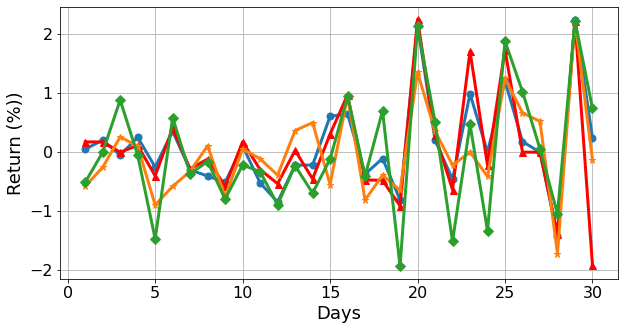

In [218]:
symbols = mr.columns
draw_syms = random.sample(list(symbols), 4)
print(f"Draw random tickers of VN30: {draw_syms}")
plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,period+1)],period*mr[draw_syms[0]],lw=3,marker='o',markersize=7)
plt.plot([i for i in range(1,period+1)],period*mr[draw_syms[1]],lw=3,c='red',marker='^',markersize=7)
plt.plot([i for i in range(1,period+1)],period*mr[draw_syms[2]],lw=3,marker='*',markersize=7)
plt.plot([i for i in range(1,period+1)],period*mr[draw_syms[3]],lw=3,marker='D',markersize=7)

plt.xlabel("Days",fontsize=18)
plt.ylabel("Return (%))",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

In [219]:
ret_data = mr.values.T
mean_r = np.asarray(np.mean(ret_data, axis=1)) #mean
n = len(symbols)
for s,r in zip(symbols,mean_r):
    print(f"{s}: {r}")

mwg: -0.0018677128946875475
hbd: 0.0022012592889968235
ctg: 0.0064342278305089635
bid: 0.0038552308074575525
hpg: 0.0030231257306746204
pow: 0.0024048451873024245
plx: 0.0022198960986535453
nvl: 0.004900630692116143
kdh: -0.0021512320757094464
vcb: 0.0050745907478392015
msn: -0.004603910629751787
tcb: 0.0021045669825624715
fpt: -0.00038233997704082974
vic: 0.0019871256480326633
vnm: 0.00015934407692976224
tpb: 0.0018904433508939189
vre: 0.004469691625744209
pdr: 0.0012767773578426362
pnj: 0.0019384706042664369
gas: 0.001781070110051425
mbb: 0.003285760675676374
ssi: 0.00011953542223148624
bvh: 0.002957885728947236
stb: 0.0025358630623661393
vhm: -4.131477783292263e-05
vjc: 0.0006744432945123176
gvr: 0.00261007371378099
abc: -0.0007866438350023065
sab: 0.0034856948798939412
vpb: 0.004832783725232532


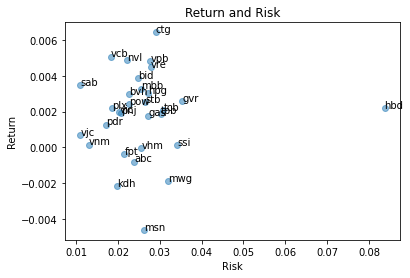

In [220]:
std = np.asarray(np.std(ret_data,  axis=1)) #std
C = np.asmatrix(np.cov(ret_data)) #corvariance
x = Variable(n)
fig, ax = plt.subplots()
ax.scatter(x=std, y=mean_r, alpha=0.5)
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')
for i, symbol in enumerate(symbols):
    ax.annotate(symbol, (std[i], mean_r[i]))
plt.show()

In [221]:
# Average return of the VN30
print(f"Average return of VN30 in previous {period} days is {mean_r.mean()}")

Average return of VN30 in previous 30 days is 0.0018796727484162992


In [235]:
# Optimizer
from scipy.optimize import minimize, Bounds, LinearConstraint

#set expected 
req_return = 0.001

def objective(weights): 
    weights = np.array(weights)
    return weights.dot(mr.cov()).dot(weights.T)
 
# The constraints
cons = ({"type":"eq", "fun": lambda x: np.sum(x)-1}, 
        {"type": "ineq", "fun": lambda x: np.sum(mr.mean()*x)-req_return}) 
# Every stock can get any weight from 0 to 1
bounds = tuple((0,1) for x in range(mr.shape[1])) 
guess = [1./mr.shape[1] for x in range(mr.shape[1])]

optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
final_weights = pd.DataFrame(list(zip(symbols, optimized_results.x)), columns=['Symbol', 'Weight'])
final_weights.sort_values('Weight', ascending=False, ignore_index=True, inplace=True)


In [265]:
thresh_hold_invest = 0.005
df = final_weights[final_weights['Weight'] > thresh_hold_invest]
print("Below is the portfolio of tickers counted for VN30 Index for Investment with 1 billion vnd")
print("The threshold of invest is 5 million vnd")
print("----------------------------")
for i in df.index:
    print(f"Investment in {df.loc[i].values[0].upper()} with {round(df.loc[i].values[1]*100,3)}%, respectively {round(df.loc[i].values[1]*1e9,0)} vnđ ")

Below is the portfolio of tickers counted for VN30 Index for Investment with 1 billion vnd
The threshold of invest is 5 million vnd
----------------------------
Investment in VJC with 12.754%, respectively 127540956.0 vnđ 
Investment in SAB with 11.824%, respectively 118235550.0 vnđ 
Investment in VNM with 10.363%, respectively 103633550.0 vnđ 
Investment in KDH with 10.014%, respectively 100136741.0 vnđ 
Investment in NVL with 9.9%, respectively 99004773.0 vnđ 
Investment in PDR with 7.708%, respectively 77083099.0 vnđ 
Investment in VCB with 6.287%, respectively 62869745.0 vnđ 
Investment in ABC with 4.582%, respectively 45815204.0 vnđ 
Investment in VIC with 4.483%, respectively 44829660.0 vnđ 
Investment in PNJ with 4.244%, respectively 42443314.0 vnđ 
Investment in MSN with 3.884%, respectively 38844561.0 vnđ 
Investment in HBD with 3.846%, respectively 38455919.0 vnđ 
Investment in BVH with 2.648%, respectively 26476141.0 vnđ 
Investment in FPT with 2.197%, respectively 21966704.